C'est ton premier checkpoint.
Les 5 exercices sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères.

Essaye de finir ce checkpoint en 3h30. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori.
Nous t'avons indiqué des durées estimatives. Evidemment chacun a ses forces et ses faiblesses, avance donc à ton rythme. Cependant, si tu vois que tu dépasses une durée, ne reste pas bloqué, passe à l'exercice suivant. Tu pourras revenir à la fin sur ce que tu n'as pas fini.

#SQL - 45 min

A partir de la base de données client ci-dessous, crée une **requête SQL** qui fournit :

1.   les noms de chaque catégorie,
2.   le chiffre d'affaire associé à cette catégorie,
3.   et le prix moyen pondéré des produits vendus pour cette catégorie.

Le prix moyen sera arrondi à 2 décimales.

Ce tableau devra être trié pour avoir les catégories avec le chiffre d'affaire le plus élevé en premier.


*** Voici le schéma de la base ***
*********************

![](https://github.com/murpi/wilddata/blob/master/quests/orders_schema.png?raw=true)




*** Voici les premières lignes attendues ***
*********************

Categories | Chiffre_d_affaire | Prix_moyen
- |:-: | -:
Beverages | 99464.50 | 43.45
Dairy Products | 69921.00 | 26.88
... | ... | ...


In [1]:
# Exécute le code ci-dessous sans rien modifier
import requests
import sqlite3
import pandas as pd
r = requests.get('https://github.com/WildCodeSchool/wilddata/blob/main/orders.db?raw=true')
open('orders.db', 'wb').write(r.content)
conn = sqlite3.connect('orders.db')
def SQL(script):
    global conn
    return pd.read_sql(script, conn)



In [138]:
# Modifie la requête SQL dans cette variable
script_sql = """
-- Ici tu peux écrire ton code SQL
SELECT
  c.CategoryName,
  SUM(od.Quantity * p.Price) AS Chiffre_d_affaire,
  ROUND(SUM(od.Quantity * p.Price) / NULLIF(SUM(od.Quantity),0), 2) AS Prix_moyen
FROM
  categories c
JOIN
  products p ON c.CategoryID = p.CategoryID
LEFT JOIN
  order_details od ON p.ProductID = od.ProductID
GROUP BY
  c.CategoryName
ORDER BY
  Chiffre_d_affaire DESC;

-- Ne modifie rien ci-dessous pour obtenir le résultat de la requête
"""
SQL(script_sql)

,CategoryName,Chiffre_d_affaire,Prix_moyen
0,Beverages,99464.50,43.45
1,Dairy Products,69921.00,26.88
2,Confections,54909.16,26.02
3,Meat/Poultry,51676.52,40.12
4,Condiments,35071.60,25.36
5,Seafood,29652.30,20.52
6,Produce,23401.40,32.73
7,Grains/Cereals,22327.75,24.48


In [ ]:
# Modifie la requête SQL dans cette variable
script_sql = """
-- Ici tu peux écrire ton code SQL
SELECT customers.CustomerID, COUNT(OrderID)
FROM customers
LEFT JOIN orders on customers.CustomerID = orders.CustomerID
group by customers.CustomerID

-- Ne modifie rien ci-dessous pour obtenir le résultat de la requête
"""
SQL(script_sql)

,CustomerID,COUNT(OrderID)
0,1,0
1,2,1
2,3,1
3,4,2
4,5,3
...,...,...
86,87,7
87,88,2
88,89,2
89,90,1


# Tableur ou Business Intelligence - 45 min

Le responsable du reporting mensuel est absent, et il faut absolument envoyer le reporting de chiffre d'affaire (quantité * prix de chaque produit) aujourd'hui... mais impossible de remettre la main sur le fichier du mois dernier !

Heureusement, tu as trouvé comment extraire les données, [tu les trouveras ici.](https://docs.google.com/spreadsheets/d/1T7zh6Swn4Yj8Feu-xcp-B7xeOQfBoBSWn7sRjx07GvI/edit?usp=sharing)

Tu vas maintenant devoir recréer un graphique qui ressemblera au maximum à celui-ci, mais **en incluant les données du dernier mois**. Tu en profiteras pour ajouter **l'affichage des mois sous les colonnes**. Tu essaieras au maximum d'utiliser les tableaux croisés dynamiques pour faire cela.
**Tu peux utiliser l'outil de ton choix (GSheets, MS Excel, MS Power BI ou Tableau).**

Tu incluras l'image du graphique dans ce notebook, et tu indiqueras également le lien de ton google spreadsheet (ou MS Excel online) que tu auras pris soin de partager.

**Ne t'embête pas à avoir exactement les mêmes couleurs** que sur l'exemple, notamment si tu as utilisé un autre outil, ce sont les valeurs et la lisibilité qui sont importantes.

![Tableur checkpoint](https://github.com/murpi/wilddata/raw/master/checkpoint1_withoutdate.png)

[mon google sheet](https://docs.google.com/spreadsheets/d/1VOLChpV3SXRhN0wwQYrgst4n0U-WuAkLOoT_neifdvY/edit?usp=sharing)

Saving checkpoint1sheet.jpg to checkpoint1sheet.jpg


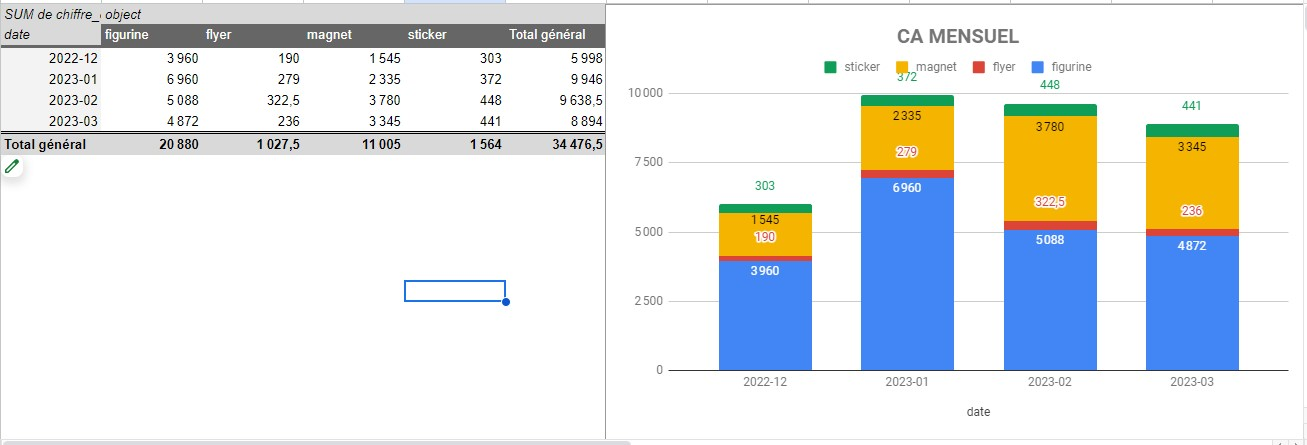

In [135]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

image_filename = list(uploaded.keys())[0]

Image(image_filename)


# Python : Algo 1 Météo - 30 min

Tu veux créer un script qui te dit comment t'habiller en fonction de la météo du jour :


## 1.1 Température
* S'il fait strictement plus de 19 degrés,  le script doit afficher "Prends un t-shirt"
* S'il fait entre 12 et 19 degrés inclus, le script doit afficher "Prends un pull"
* S'il fait strictement moins de 12 degrés, le script doit afficher "Prends un manteau"

La variable température contiendra un nombre entier (nous avons mis `14` par défaut, n'hésite pas à modifier cette valeur pour tester)

In [9]:
temperature = 20

# Tu écriras ton script ici :
def fonction_temperature(temperature):
    if temperature > 19:
        return 'Prends un t-shirt'
    elif 12 <= temperature <= 19:
        return 'Prends un pull'
    else:
        return 'Prends un manteau'
resultat = fonction_temperature(temperature)
print(resultat)


Prends un t-shirt


## 1.2 Pluie

Tu va recopier ton script de la question précédente (1.1) et le modifier pour intégrer la contrainte suivante :
* Si la variable `pluie` vaut "YES", alors le script affiche "Prends un manteau", quelle que soit la température.

In [12]:

# Tu écriras ton script ici :
temperature = 20
pluie = 'YES'
def fonction_temperature(temperature,pluie):
    if pluie == 'YES':
        return 'Prends un manteau'
    elif temperature > 19:
        return 'Prends un t-shirt'
    elif 12 <= temperature <= 19:
        return 'Prends un pull'
    else:
        return 'Prends un manteau'
resultat = fonction_temperature(temperature,pluie)
print(resultat)


Prends un manteau


## 1.3 Opérateurs logiques (optionnel)

Essaye d'écrire le script précédent (1.2) en utilisant au maximum une seule fois la commande `if` et au maximum une seule fois la commande `elif`.

In [ ]:
# Tu écriras ton script ici :



# Python : Algo 2 - 30 min

Un magasin importe des produits américains et les revend sur le marché européen. Il propose à ses clients un discount pour les produits les plus chers (10% de réduction à partir de 500 euros d'achat, 15% à partir de 1000 euros, et 20% à partir de 2000 euros).

Le magasin a une liste de prix en dollars et fait appel à tes services pour déterminer pour chaque prix, le montant que paiera le client en euros (après application de la remise).


## Python 2.1 dollar_to_euro
Crée une fonction `dollar_to_euro` qui prend en paramètre un nombre décimal et retourne le montant converti en euro (dans le sens dollar vers euro, prends le taux en vigueur le jour du checkpoint).

In [22]:
def dollar_to_euro(amount_usd):
    taux_change = 0.95 #taux de change euro au 13 oct 2023 https://www.google.com/search?q=taux+dollar+vers+euros&rlz=1C1CHBF_frFR922FR922&oq=taux+dollar+vers+euros&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIKCAIQIRgWGB0YHtIBCDQ3NjVqMWo3qAIAsAIA&sourceid=chrome&ie=UTF-8
    amount_eur = amount_usd * taux_change
    return amount_eur
montant_usd = 100
montant_eur = dollar_to_euro(montant_usd)

print(f'{montant_usd} USD équivaut à {montant_eur:.2f} EUR')

100 USD équivaut à 95.00 EUR


## Python 2.2 discount
Crée une fonction `discount` qui prend en paramètre un nombre décimal et retourne le pourcentage de réduction :
- 0.10 si l'argument est supérieur à 500
- 0.15 si l'argument est supérieur à 1000
- 0.20 si l'argument est supérieur à 2000

In [26]:
def discount(amount):
    if amount > 2000:
        return 0.20
    elif amount > 1000:
        return 0.15
    elif amount > 500:
        return 0.10
    else:
        return 0.0 #on suppose qu'il n'y aura pas de réduc si le montant est inférieur ou égl à 500

#test
montant_a_payer = 1750
pourcentage_reduc = discount(montant_a_payer)
print(f'Pourcentage de reduc : {pourcentage_reduc * 100}%')

Pourcentage de reduc : 15.0%


## Python 2.3 Utilisation
Utilise tes deux fonctions pour **afficher une phrase** pour chacun des montants de cette liste de prix en dollars, indiquant le montant à payer en euros.
Tu dois donc appliquer d'abord la fonction de conversion pour obtenir des euros, puis la fonction de discount, puis afficher une phrase à partir du résultat.

In [36]:
price_list = [256, 1458, 2387, 669, 508, 1365]

def dollar_to_euro(amount_usd):
    taux_change = 0.95
    amount_eur = amount_usd * taux_change
    return amount_eur

def discount(amount):
    if amount > 2000:
        return 0.20
    elif amount > 1000:
        return 0.15
    elif amount > 500:
        return 0.10
    else:
        return 0.0

for price in price_list:
    montant_eur = dollar_to_euro(price)
    pourcentage_reduc = discount(price)
    montant_apres_reduc = montant_eur * (1 - pourcentage_reduc)

    print(f'Montant en USD : {price} $')
    print(f'Montant en EUR après conversion : {montant_eur:.2f} €')
    print(f'Pourcentage de réduc: {pourcentage_reduc * 100}% ')
    print(f'Montant à payer avec reduction: {montant_apres_reduc:.2f}\n')


Montant en USD : 256 $
Montant en EUR après conversion : 243.20 €
Pourcentage de réduc: 0.0% 
Montant à payer avec reduction: 243.20

Montant en USD : 1458 $
Montant en EUR après conversion : 1385.10 €
Pourcentage de réduc: 15.0% 
Montant à payer avec reduction: 1177.33

Montant en USD : 2387 $
Montant en EUR après conversion : 2267.65 €
Pourcentage de réduc: 20.0% 
Montant à payer avec reduction: 1814.12

Montant en USD : 669 $
Montant en EUR après conversion : 635.55 €
Pourcentage de réduc: 10.0% 
Montant à payer avec reduction: 572.00

Montant en USD : 508 $
Montant en EUR après conversion : 482.60 €
Pourcentage de réduc: 10.0% 
Montant à payer avec reduction: 434.34

Montant en USD : 1365 $
Montant en EUR après conversion : 1296.75 €
Pourcentage de réduc: 15.0% 
Montant à payer avec reduction: 1102.24



# Python : Algo 3 - 1h

Ecris une fonction *monnaie_a_rendre()* qui prend deux arguments obligatoires :
- montant de l'achat : float, supérieur à 0
- monnaie du client : integer, supérieur à 0

La fonction devra afficher la monnaie à rendre au client en un minimum de billets/pièces.

Attention, si la monnaie du client est insuffisante (inférieure à l'achat), il faudra l'indiquer.

Exemple :


```
monnaie_a_rendre(26.57 , 40)
>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1
```



In [134]:
def monnaie_a_rendre(achat, monnaie):
    if monnaie < achat:
        print("Monnaie insuffisante.")
        return

    montant_rendu = monnaie - achat
    billets_pieces = [10, 5, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
    rendu = {}

    for valeur in billets_pieces:
        quantite = int(montant_rendu // valeur)
        if quantite > 0:
            montant_rendu -= quantite * valeur
            if valeur >= 1:
                rendu[f"billet {int(valeur)} euros"] = quantite
            else:
                rendu[f"pièce {int(valeur * 100)} cent{'s' if valeur == 0.01 else ''}"] = quantite

    for item, quantite in rendu.items():
        print(f"Nb {item} : {quantite}")

# Exemple d'utilisation
monnaie_a_rendre(26.57, 40)


Nb billet 10 euros : 1
Nb billet 2 euros : 1
Nb billet 1 euros : 1
Nb pièce 20 cent : 2
Nb pièce 2 cent : 1


In [131]:
def monnaie_a_rendre(achat, monnaie):
    if monnaie < achat:
        print("Monnaie insuffisante.")
        return

    monnaie_a_rendre = round(monnaie - achat, 2)
    billets_pieces_disponibles = [
        (10, 'billet'), (5, 'billet'), (2, 'billet'), (1, 'billet'),
        (0.5, 'piece'), (0.2, 'piece'), (0.1, 'piece'), (0.05, 'piece'),
        (0.02, 'piece'), (0.01, 'piece')
    ]

    rendu = {}
    for valeur, type_monnaie in billets_pieces_disponibles:
        if monnaie_a_rendre >= valeur:
            if type_monnaie == 'billet':
                quantite = int(monnaie_a_rendre // valeur)
                rendu[valeur] = quantite
                monnaie_a_rendre -= quantite * valeur
            else:
                quantite = int(round(monnaie_a_rendre / valeur, 2))
                rendu[valeur] = quantite
                monnaie_a_rendre -= quantite * valeur

    for valeur, quantite in rendu.items():
        if valeur >= 1:
            print(f"Nb billets {int(valeur)} euros : {quantite}")
        else:
            if valeur == 0.01:
                print(f"Nb pièces {int(valeur * 100)} cent : {quantite}")
            else:
                print(f"Nb pièces {int(valeur * 100)} cents : {quantite}")


In [127]:
# Pour tester :
monnaie_a_rendre(26.57, 40)

Nb billets 10 euros : 1
Nb billets 2 euros : 1
Nb billets 1 euros : 1
Nb pièces 20 cents : 2
Nb pièces 2 cents : 1


In [128]:
monnaie_a_rendre(12.15, 20)

Nb billets 5 euros : 1
Nb billets 2 euros : 1
Nb pièces 50 cents : 1
Nb pièces 20 cents : 1
Nb pièces 10 cents : 1
Nb pièces 2 cents : 2


In [129]:
monnaie_a_rendre(10.10, 20 )

Nb billets 5 euros : 1
Nb billets 2 euros : 2
Nb pièces 50 cents : 1
Nb pièces 20 cents : 2
